In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000770460"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000770460
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,PEOPLES FINANCIAL CORP /MS/
Ticker,PFBX


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,65.0,1.866538e+01,1.951363e+00,14.85,17.27,18.53,20.22,21.64
net income,51.0,2.907255e+05,1.878443e+06,-9119000.00,-30500.00,405000.00,878500.00,5090000.00
net interest income,50.0,5.576300e+06,1.137820e+06,4219000.00,4547500.00,5439500.00,6565750.00,7860000.00
provision for loan losses,49.0,8.831429e+05,1.157604e+06,-1197000.00,48000.00,540000.00,1500000.00,5042000.00


# Plots

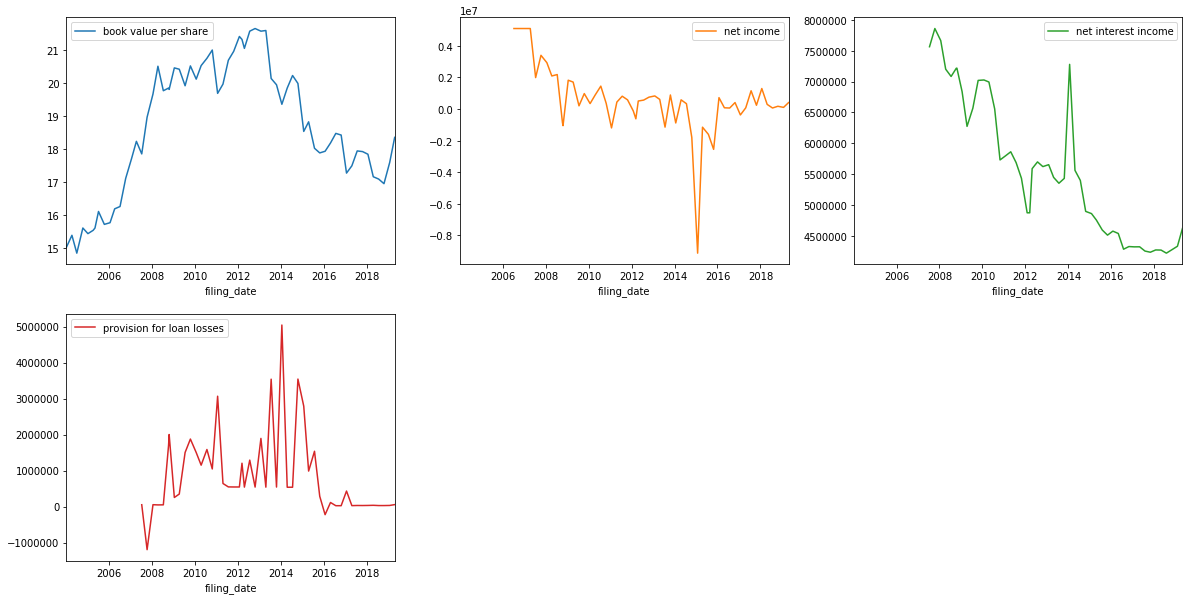

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000770460 interest income                                    None      empty   
           net income                 2003Q4 to 2006Q1: 10 periods    missing   
           net income                  2006Q3 to 2007Q1: 3 periods    missing   
           net income                                       2011Q4  duplicate   
           net interest income        2003Q4 to 2007Q1: 14 periods    missing   
           provision for loan losses  2003Q4 to 2007Q1: 14 periods    missing   
           provision for loan losses                        2011Q4  duplicate   
           provision for loan losses                        2016Q3    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000770460 interest income            No values for item  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

,,fiscal_period,item_value,src_table,src_row,src_column,src_value,src_units
filing_date,item,,,,,,,
2004-01-13,book value per share,2003Q4,15.03,Selected Ratios,Book Value Per Share,2003,15.03,"(In Thousands, Except Per Share Amounts)"
2004-04-15,book value per share,2004Q1,15.39,Selected Ratios,Book Value Per Share,2004,$15.39,None
2004-07-07,book value per share,2004Q2,14.85,Selected Ratios,Book Value Per Share,2004,$14.85,"(In Thousands, Except Per Share Amounts)"
2004-10-18,book value per share,2004Q3,15.61,Selected Ratios,Book Value Per Share,2004,15.61,None
2005-01-12,book value per share,2004Q4,15.44,Selected Ratios,Book Value Per Share,2004,15.44,None
2005-04-11,book value per share,2005Q1,15.54,Selected Ratios,Book Value Per Share,2005,15.54,None
2005-05-12,book value per share,2005Q1,15.61,Selected Ratios,Book Value Per Share,2005,15.61,None
2005-07-11,book value per share,2005Q2,16.11,Selected Ratios,Book Value Per Share,2005,16.11,None
2005-10-18,book value per share,2005Q3,15.72,Selected Ratios,Book Value Per Share,2005,15.72,"(In Thousands, Except Per Share Amounts)"


In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()